<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [10]:
%load_ext autoreload
%autoreload 2

In [31]:
import os
import sys
sys.path.append('../')
from search_world.utils.moog_utils import get_trial_paths, get_trial_dataframe
import matplotlib.pyplot as plt
from matplotlib import cm

In [85]:
DATASETS = ['/Users/aidapiccato/search-world-1/logs/symm_corr/0/2021_11_09_15_24_12']

In [109]:

for trial_paths in dataset_trial_paths[1:]:
    dataset_index += 1
    new_df = get_trial_dataframe.get_trial_dataframe(trial_paths, dataset_index=dataset_index)
    trial_df = trial_df.append(new_df, ignore_index=True)

In [110]:
dataset_trial_paths = []
for i, path in enumerate(DATASETS):
    print(os.path.basename(path))
    trial_paths = get_trial_paths(path)
    dataset_trial_paths.append(trial_paths)


2021_11_09_15_24_12
Number of trials:  2


In [117]:
## Get trial dataframe

dataset_index = 0
trial_df = get_trial_dataframe(dataset_trial_paths[0], dataset_index=dataset_index)

TAKING AN ACTION
0 3 3 {'agent_state': 1}
TAKING AN ACTION
1 0 3 {'agent_state': 4}
TAKING AN ACTION
2 5 3 {'agent_state': 8}
TAKING AN ACTION
0 3 3 {'agent_state': 1}
TAKING AN ACTION
1 0 3 {'agent_state': 4}
TAKING AN ACTION
2 5 3 {'agent_state': 8}
TAKING AN ACTION
3 7 3 {'agent_state': 12}


In [119]:
trial_df

,trial_dict,time,prey,grid_side,half_grid_side,maze_size,y_vertex_min,maze_array,length,n_corr,...,actions,action_times,obs,reward,done,step,info,name,trial_index,dataset_index
0,"[[[time, 1636489453.566568], [reward, 0.0], [s...","[0.0, 0.1307539939880371, 0.24933505058288574,...","[6.0, 3.999999999999999]",0.045455,0.022727,11,0.073353,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, ...",5,3,...,"[3, 3, 3]","[1636489456.8502212, 1636489457.980277, 163648...","[3, 0, 5, 7]","[-3, -3, -3, 10]","[False, False, False, True]","[0, 0, 1, 2]","[{'agent_state': 1}, {'agent_state': 4}, {'age...",Human,0,0
1,"[[[time, 1636489460.1061702], [reward, None], ...","[0.0, 0.08572578430175781, 0.17017865180969238...","[7.000000000000001, 4.000000000000001]",0.045455,0.022727,11,0.359027,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, ...",5,3,...,"[3, 3, 3, 3]","[1636489460.8544571, 1636489460.935452, 163648...","[3, 0, 5, 7, 1]","[-3, -3, -3, 10, -3]","[False, False, False, True, False]","[0, 0, 1, 2, 3]","[{'agent_state': 1}, {'agent_state': 4}, {'age...",Human,1,0


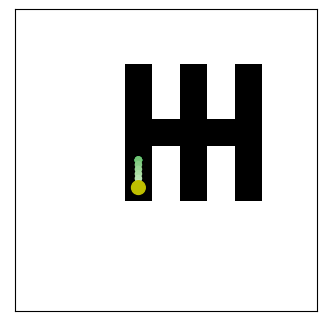

In [34]:
def plot_maze(orig_maze_array, prey_pos, agent_pos):
    f = plt.figure(dpi=100)
    plt.imshow(np.flip(np.stack(orig_maze_array), axis=0), cmap='binary_r')
    prey = plt.Circle(prey_pos, color='y', radius=0.25)
    agent_pos = agent_pos
    cmap = [cm.get_cmap('Greens_r', len(agent_pos))(i) for i in range(len(agent_pos))]
    plt.gca().add_patch(prey)    
    agent_pos = np.stack(agent_pos)
    plt.scatter(agent_pos[:, 0], agent_pos[:, 1], c=cmap,  s=20)
    plt.gca().set_yticks([])
    plt.gca().set_xticks([])

trial_idx = 2
plot_maze(np.flip(trial_df.iloc[trial_idx].maze_array, axis=0), trial_df.iloc[trial_idx].prey, trial_df.iloc[trial_idx].agent)